In [2]:
import sys

import numpy as np
import osmnx as ox
import pandas as pd

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

In [3]:

address = "600 Montgomery St, San Francisco, California, USA"
G = ox.graph_from_address(address=address, dist=500, dist_type="bbox", network_type="bike")

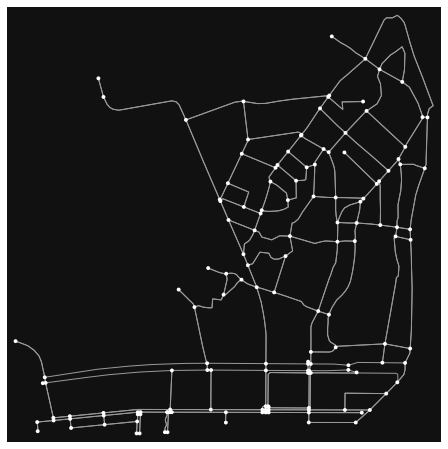

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
#Sansa_elem
(33.259311, 131.68277)
G = ox.graph_from_point((33.259311, 131.68277), dist=750, network_type='all')
ox.plot_graph(G)

In [6]:
# add node elevations from a single raster file
# some nodes will be null because the single file does not cover the graph's extents
#raster_path = "./input_data/elevation1.tif"
raster_path="./49316500.tif"
G = ox.elevation.add_node_elevations_raster(G, raster_path, cpus=1)

In [16]:
raster_paths=[]
for i in range(49316500,49316600):
    raster_paths += ["./PackDLMap/FG-GML-4931-65-DEM5A/"+str(i)+".tif"]
for i in range(49317500,49317537):
    raster_paths += ["./PackDLMap/FG-GML-4931-75-DEM5A/"+str(i)+".tif"]
#raster_paths = ["./input_data/elevation1.tif", "./input_data/elevation2.tif"]
G = ox.elevation.add_node_elevations_raster(G, raster_paths)
assert not np.isnan(np.array(G.nodes(data="elevation"))[:, 1]).any()

In [17]:
# add edge grades and their absolute values
G = ox.elevation.add_edge_grades(G, add_absolute=True)

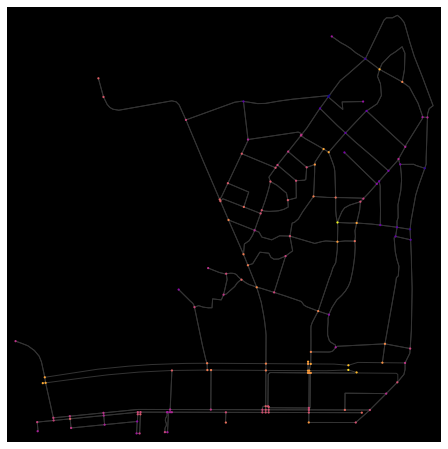

In [18]:
# get one color for each node, by elevation, then plot the network
nc = ox.plot.get_node_colors_by_attr(G, "elevation", cmap="plasma")
fig, ax = ox.plot_graph(G, node_color=nc, node_size=5, edge_color="#333333", bgcolor="k")

In [19]:

# calculate the edges' absolute grades (and drop any infinite/null values)
grades = pd.Series([d["grade_abs"] for _, _, d in ox.get_undirected(G).edges(data=True)])
grades = grades.replace([np.inf, -np.inf], np.nan).dropna()

In [20]:
grades

0      0.009
1      0.001
2      0.001
3      0.006
4      0.002
       ...  
212    0.006
213    0.010
214    0.002
215    0.019
216    0.010
Length: 217, dtype: float64

In [27]:
#ネットワークのノード一覧
G.nodes()

NodeView((653088304, 653088311, 653088326, 653089203, 653089206, 659038160, 1654295230, 1654295234, 1654295236, 1654295240, 1654295244, 1654295259, 1654295261, 1654295263, 1654295268, 1654295274, 1654295288, 1654295301, 1654295302, 1654295304, 1654295311, 1654295321, 1654295322, 1654295324, 1654295325, 1654295329, 1654295425, 1654295429, 1654295442, 1676761745, 1676761771, 1682707025, 1682707027, 1786760743, 1786760748, 1786760754, 1786760765, 1786760768, 1786760771, 1786760774, 1786760781, 1786760784, 1786760788, 1786760796, 1786760797, 2027030167, 2027030198, 2027033980, 2739341727, 2739341739, 2739341748, 2739341764, 2739341772, 2739341775, 2739341777, 2739341787, 2739341791, 2739341794, 2739341807, 2739341809, 2739341821, 2739341824, 2739341846, 2739341873, 2739341880, 2739341883, 5318082748, 5318087015, 5318087020, 5318087123, 5322611224, 5322611226, 5322611228, 5322611231, 5322611234, 5322611235, 5322617791, 5322617792, 5334498973, 5334498978, 5334498982, 5334498984, 5334498991, 

In [26]:
#ノード653088304の持つ属性値. elevationが標高
G.nodes[653088304]

{'y': 33.2532518,
 'x': 131.6833514,
 'highway': 'traffic_signals',
 'street_count': 4,
 'elevation': 2.799999952316284}